In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
batch_size = 128
num_classes = 10
learning_rate = 0.001
# num_epochs = 10

In [ ]:
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [ ]:
class LeNet(nn.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2)
        )
        layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2)
        )
        self.conv_model = nn.Sequential(
            *layer1, *layer2
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        )
        
    def forward(self, x):
        out = self.conv_model(x)
        out = out.reshape(out.size(0), -1)
        out = self.fc_model(out)
        return out

In [ ]:
model = LeNet(num_classes).to(device)
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# total_step = len(train_loader)

# total_step = len(train_loader)
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):  
#         images = images.to(device)
#         labels = labels.to(device)
        
#         #Forward pass
#         outputs = model(images)
#         loss = cost(outputs, labels)
        	
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        		
#         if (i+1) % 400 == 0:
#             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#         		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [ ]:
def evaluation():
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100*(correct/total)
    # print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
Train accuracy : 96.49
Train accuracy : 97.86
Train accuracy : 98.26
Train accuracy : 98.43
Train accuracy : 98.51
Train accuracy : 98.59
Train accuracy : 98.51
Train accuracy : 98.76
Train accuracy : 98.75
Train accuracy : 98.45


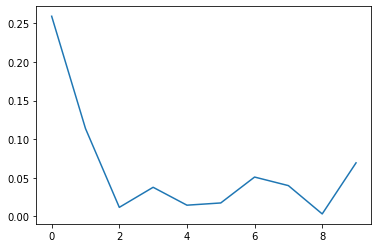

In [ ]:
%time
def fit(max_epochs = 10):
    
    loss_arr = []
    loss_epoch_arr = []
    
    for epoch in range(max_epochs):
        for i, data in enumerate(train_loader,0): # Iterating through the train loader 
            inputs,labels = data
            inputs,labels = inputs.to(device),labels.to(device)

            optimizer.zero_grad()     # Reset the gradient in every iteration

            outputs = model(inputs)
            loss = cost(outputs,labels)   # Loss forward pass
            loss.backward()                  # Loss backaed pass
            optimizer.step()                       # Update all the parameters by the given learnig rule

            loss_arr.append(loss.item())
        loss_epoch_arr.append(loss.item())
        print(f"Train accuracy : {evaluation():.2f}")

    plt.plot(loss_epoch_arr)
    plt.show()
    
fit()